In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
from mpmath import ellipk,log
from scipy.special import gamma as GAMMA
import os 
#from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from MoreSources import *
from scipy.misc import derivative as scider
import pandas as pd
from scipy.linalg import eigh,eig,eigvalsh
from functools import partial
import seaborn as sns
from FeynmanHellman import *
from saddlefinder import *
import csv
from Decorators import *
from YuanDos import *
from DosHelper import*
TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

In [61]:
theta = 1.05
sad = find_saddle(xGuess = (0.025,0.025),Theta = theta*IN_RADIAN)
print(sad)
kTheta = 8 * np.pi * np.sin(theta*IN_RADIAN/2.0) / (3*np.sqrt(3))
print('kTheta = ', kTheta)
print('location of saddle in k-space = ', np.sqrt(sad[0]**2 + sad[1]**2))
Esad = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar,Theta=theta*IN_RADIAN,kx_fixed=sad[0],ky_fixed=sad[1],symmetric=True)[4]
print("Esad = ", Esad)

[0.00990726 0.04297587]
kTheta =  0.044318859051108835
location of saddle in k-space =  0.044103055219973646
Esad =  4.512924733571832e-07


In [62]:
X,Y,Z = data_for_contours(theta)

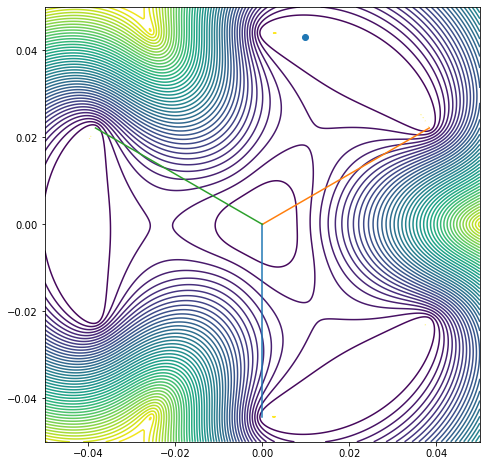

In [ ]:
#X,Y,Z = data_for_contours(theta)
r = np.linspace(0,kTheta,100)
l1x,l1y = [0*r , 0 - r]
l2x,l2y = [0 + r*np.cos(30*IN_RADIAN), 0+r*np.sin(30*IN_RADIAN)]
l3x,l3y = [0 + r*np.cos(150*IN_RADIAN), 0+r*np.sin(150*IN_RADIAN)]
plt.contour(X,Y,Z,levels = 50)
plt.scatter(sad[0],sad[1])
levs = np.array([0.005,0.05,0.5])*Esad
#plt.contour(X,Y,Z,levels = [0.001*Esad, 0.05*Esad,0.1*Esad,0.5*Esad,0.7*Esad,Esad, 2*Esad, 10*Esad])
plt.contour(X,Y,Z, levels = levs)
plt.plot(l1x,l1y)
plt.plot(l2x,l2y)
plt.plot(l3x,l3y)
ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(8,8)
ax.set_aspect('equal')

## Equation of a line in parametric form: 
$$ x = x_0 + r \cos\theta $$ 
$$ y = y_0 + r \sin\theta $$

C:\Users\Aravi\AppData\Local\Temp/ipykernel_43400/819678140.py:5: UserWarning: No contour levels were found within the data range.
  plt.contour(X,Y,Z,levels = [0,1e-7])


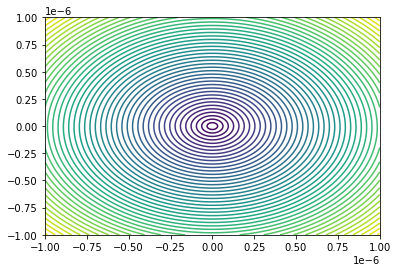

In [42]:
X = np.linspace(-0.000001,0.000001,200)
Y = np.linspace(-0.000001,0.000001,200)
X,Y,Z = data_for_contours(theta,X=X,Y=Y)
plt.contour(X,Y,Z,levels = 50)
plt.contour(X,Y,Z,levels = [0,1e-7])

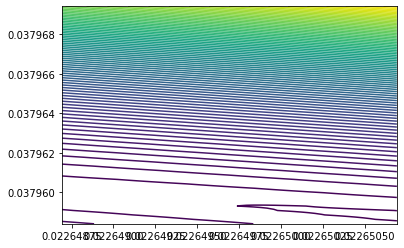

In [60]:
ang = 1.05 
kx0,ky0 = np.load('saddleset.npy')[5]
X = np.linspace(kx0-0.000001,kx0+0.000001,50)
Y = np.linspace(ky0-0.000001,ky0+0.00001,50)
X,Y,Z = data_for_contours(ang,X=X,Y=Y)
plt.contour(X,Y,Z,levels=100)
Evmag = np.load('Evs.npy')[5]
plt.contour(X,Y,Z,levels = [Evmag,1.1*Evmag])
#plt.scatter(kx0,ky0)